# Mid_bootcamp roject_Regression

In [7]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
df = pd.read_excel('/Users/AFROARC/Documents/GitHub/mid_bootcamp_project/datasets/regression_data.xls')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [13]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [12]:
df.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

In [13]:
df.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000  

[5 rows x 21 columns]

In [14]:
import seaborn as sns

In [16]:
corr_matrix = df.corr()

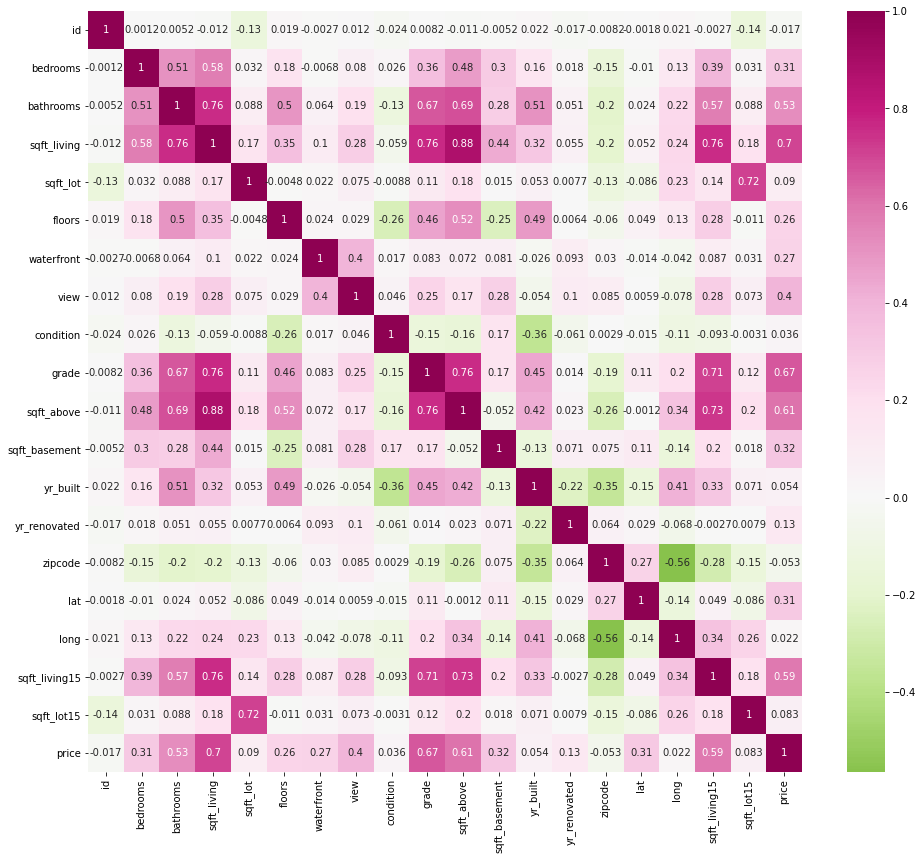

In [22]:
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr_matrix,
           cmap = 'PiYG_r',
           center = 0,
           annot = True);

In [ ]:
df[]

In [23]:
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
2      5631500400 2015-02-25         2       1.00          770     10000   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

In [16]:
df.id.value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [17]:
missing_percentage(df)

NameError: name 'missing_percentage' is not defined

In [18]:
df.isna()

id   date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21592  False  False     False      False        False     False   False   
21593  False  False     False      False        False     False   False   
21594  False  False     False      False        False     False   False   
21595  False  False     False      False        False     False   False   
21596  False  False     False      False        False     False   False   

       waterfront   view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           False  False      False  ...       False          False     False   
1           False  False      False  ...       False          False     False   
2           False  False      False  ...       False          False     False   
3           False  False      False  ...       False          False     False   
4           False  False      False  ...       False          False     False   
...           ...    ...        ...  ...         ...            ...       ...   
21592       False  False      False  ...       False          False     False   
21593       False  False      False  ...       False          False     False   
21594       False  False      False  ...       False          False     False   
21595       False  False      False  ...       False          False     False   
21596       False  False      False  ...       False          False     False   

       yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  price  
0             False    False  False  False          False       False  False  
1             False    False  False  False          False       False  False  
2             False    False  False  False          False       False  False  
3             False    False  False  False          False       False  False  
4             False    False  False  False          False       False  False  
...             ...      ...    ...    ...            ...         ...    ...  
21592         False    False  False  False          False       False  False  
21593         False    False  False  False          False       False  False  
21594         False    False  False  False          False       False  False  
21595         False    False  False  False          False       False  False  
21596         False    False  False  False          False       False  False  

[21597 rows x 21 columns]

In [21]:
from geopy import distance

538.3904453677204


In [27]:
Seattle_public_library = (47.6067, -122.3325)
salamanca = (47.5112, -122.257)
print(distance.distance(salamanca, Seattle_public_library).km)


12.042621514179238


# Distance to library

In [33]:
coords = list(zip(df.lat, df.long)) #create list of (latitude, longitude pairs)


In [30]:
#create function to calculate distance between two pairs of geographic coordinates
from geopy.distance import geodesic #import geodesic function to calculate distances
from geopy.geocoders import Nominatim
def get_distances(org_lat, org_long, dest_lat, dest_long):

    origin = (org_lat, org_long) #create tuple for origin coordinates
    destination = (dest_lat, dest_long) #create tuple for destination coordinates
    
    distance = geodesic(origin, destination).miles #calculated distance in miles
    
    return distance

In [31]:
Seattle_public_library = (47.6067, -122.3325)

pts_of_interest = [Seattle_public_library]

In [36]:
Seattle_public_library_dist = [get_distances(coords[k][0], coords[k][1], 
                              Seattle_public_library[0], Seattle_public_library[1]) for k in range(len(coords))]

In [37]:
df['distance_to_library'] = Seattle_public_library_dist


In [38]:
#preview the dataframe again to make sure values were loaded into the dataframe
df.head(15)

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1   6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2   5631500400 2015-02-25         2       1.00          770     10000     1.0   
3   2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4   1954400510 2015-02-18         3       2.00         1680      8080     1.0   
5   7237550310 2014-05-12         4       4.50         5420    101930     1.0   
6   1321400060 2014-06-27         3       2.25         1715      6819     2.0   
7   2008000270 2015-01-15         3       1.50         1060      9711     1.0   
8   2414600126 2015-04-15         3       1.00         1780      7470     1.0   
9   3793500160 2015-03-12         3       2.50         1890      6560     2.0   
10  1736800520 2015-04-03         3       2.50         3560      9796     1.0   
11  9212900260 2014-05-27         2       1.00         1160      6000     1.0   
12   114101516 2014-05-28         3       1.00         1430     19901     1.5   
13  6054650070 2014-10-07         3       1.75         1370      9680     1.0   
14  1175000570 2015-03-12         5       2.00         1810      4850     1.5   

    waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0            0     0          3  ...              0      1955             0   
1            0     0          3  ...            400      1951          1991   
2            0     0          3  ...              0      1933             0   
3            0     0          5  ...            910      1965             0   
4            0     0          3  ...              0      1987             0   
5            0     0          3  ...           1530      2001             0   
6            0     0          3  ...              0      1995             0   
7            0     0          3  ...              0      1963             0   
8            0     0          3  ...            730      1960             0   
9            0     0          3  ...              0      2003             0   
10           0     0          3  ...           1700      1965             0   
11           0     0          4  ...            300      1942             0   
12           0     0          4  ...              0      1927             0   
13           0     0          4  ...              0      1977             0   
14           0     0          3  ...              0      1900             0   

    zipcode      lat     long  sqft_living15  sqft_lot15    price  \
0     98178  47.5112 -122.257           1340        5650   221900   
1     98125  47.7210 -122.319           1690        7639   538000   
2     98028  47.7379 -122.233           2720        8062   180000   
3     98136  47.5208 -122.393           1360        5000   604000   
4     98074  47.6168 -122.045           1800        7503   510000   
5     98053  47.6561 -122.005           4760      101930  1230000   
6     98003  47.3097 -122.327           2238        6819   257500   
7     98198  47.4095 -122.315           1650        9711   291850   
8     98146  47.5123 -122.337           1780        8113   229500   
9     98038  47.3684 -122.031           2390        7570   323000   
10    98007  47.6007 -122.145           2210        8925   662500   
11    98115  47.6900 -122.292           1330        6000   468000   
12    98028  47.7558 -122.229           1780       12697   310000   
13    98074  47.6127 -122.045           1370       10208   400000   
14    98107  47.6700 -122.394           1360        4850   530000   

    distance_to_library  
0              7.482938  
1              7.921671  
2             10.184098  
3              6.574215  
4             13.449211  
5             15.670197  
6             20.519539  
7             13.648071  
8              6.525031  
9             21.687610  
10             8.770560  
11             6.057512  
12     

## export csv

In [ ]:
#df.to_csv('kc_housing_distances.csv', index=False)

In [39]:
df.columns


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'distance_to_library'],
      dtype='object')

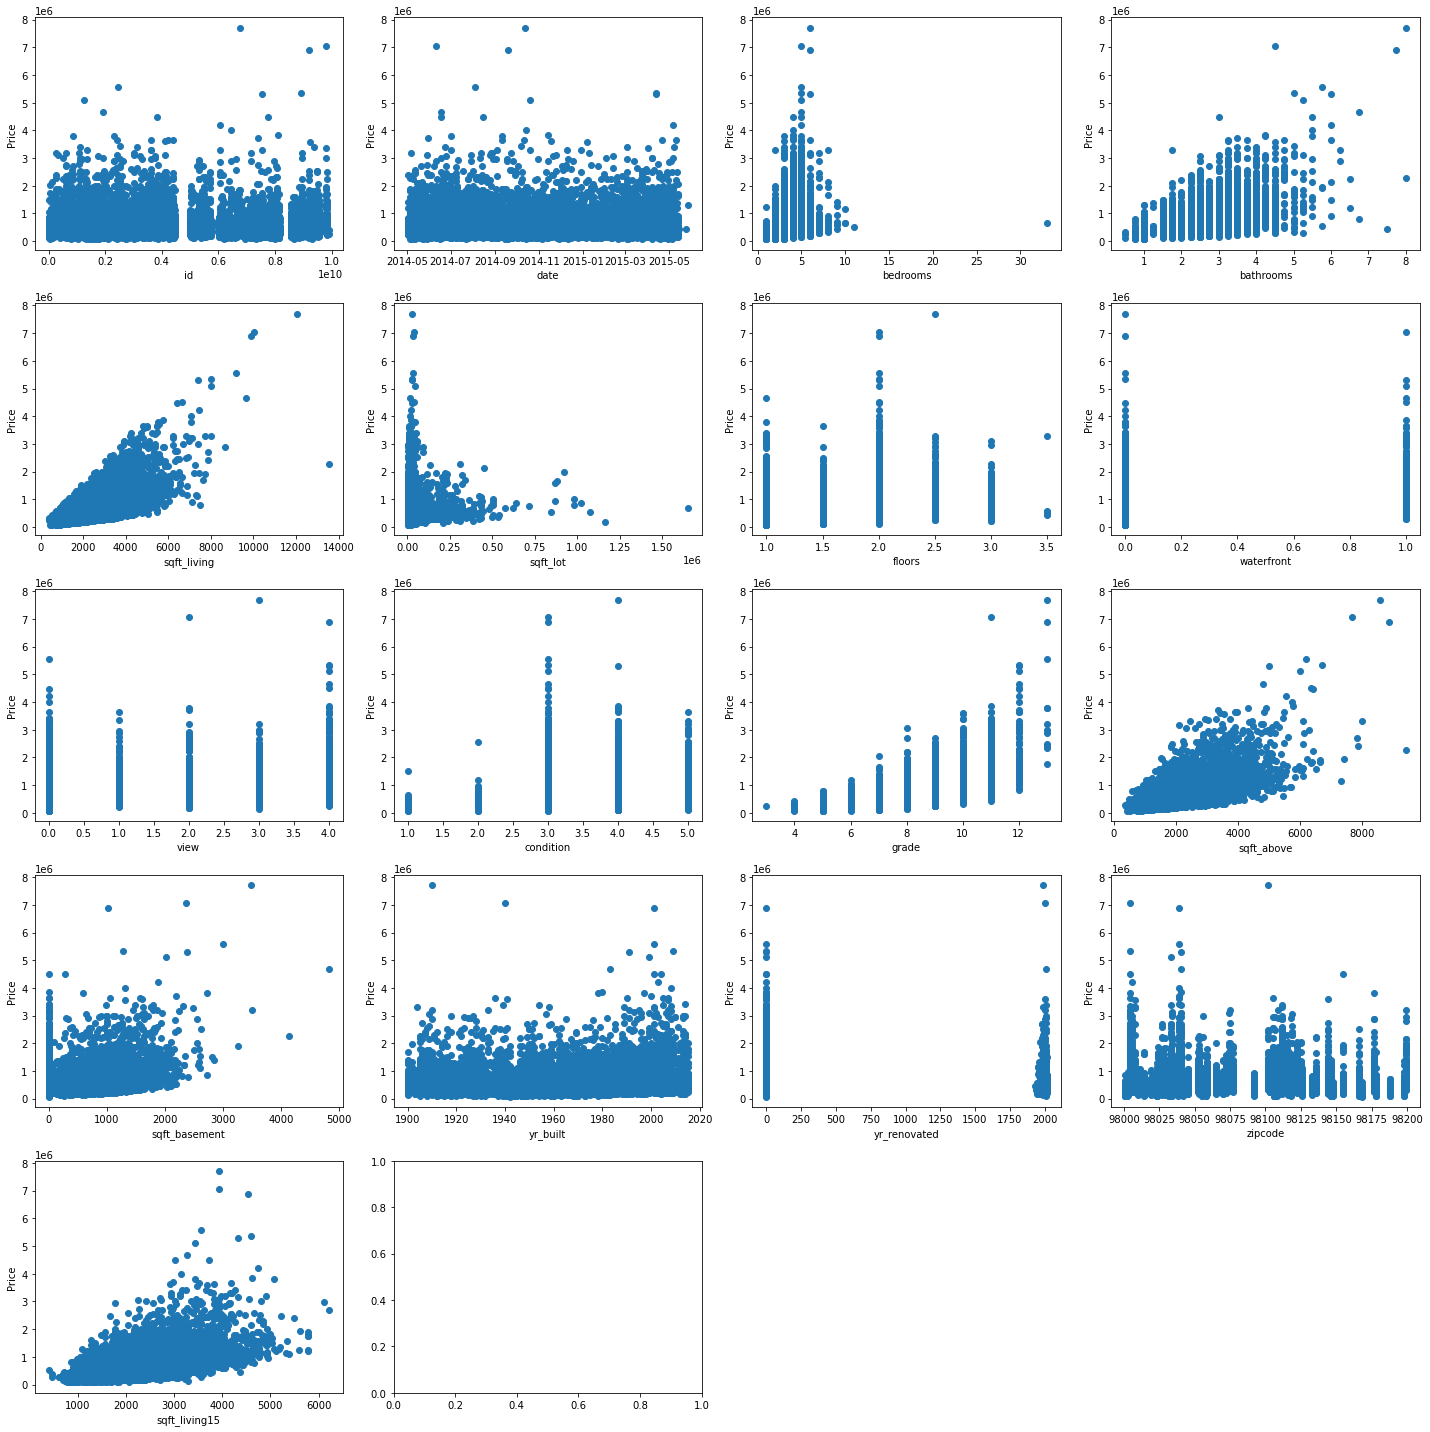

In [41]:
cont_cols = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'price', 'distance_to_library']

plt.figure(figsize=(20,20))
for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    if i > 16:
        break
    plt.scatter(df[cont_cols[i]], df['price'])
    plt.xlabel(cont_cols[i])
    plt.ylabel('Price')
plt.tight_layout()

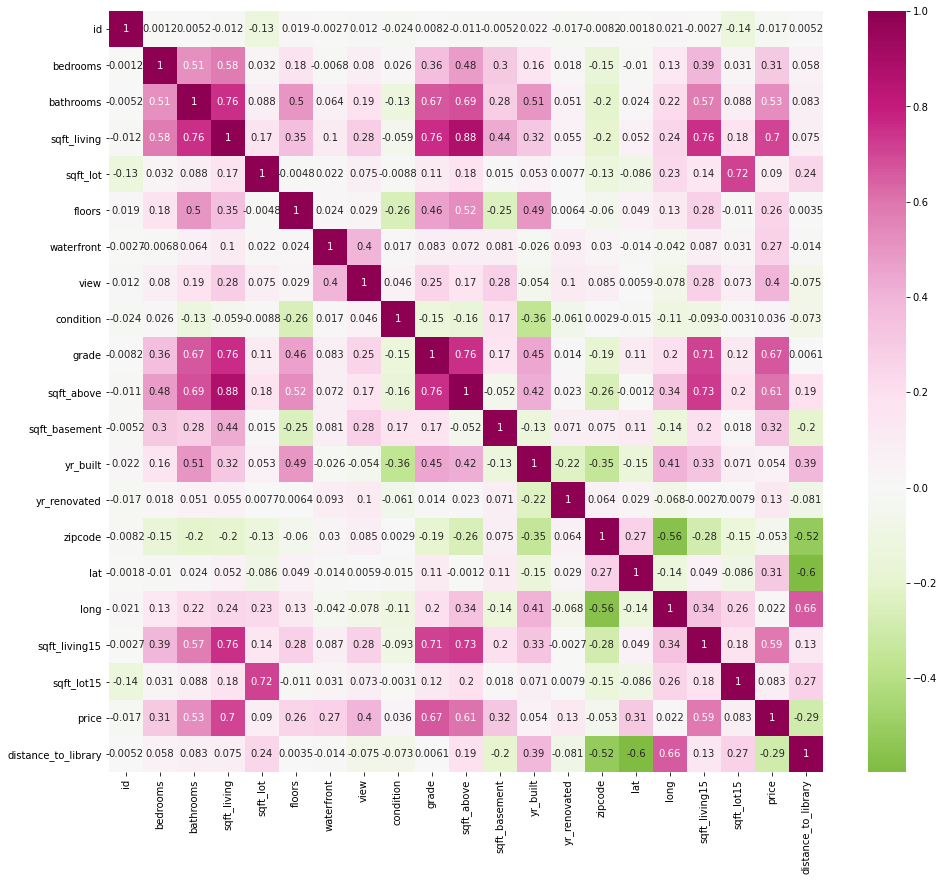

In [43]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr_matrix,
           cmap = 'PiYG_r',
           center = 0,
           annot = True);

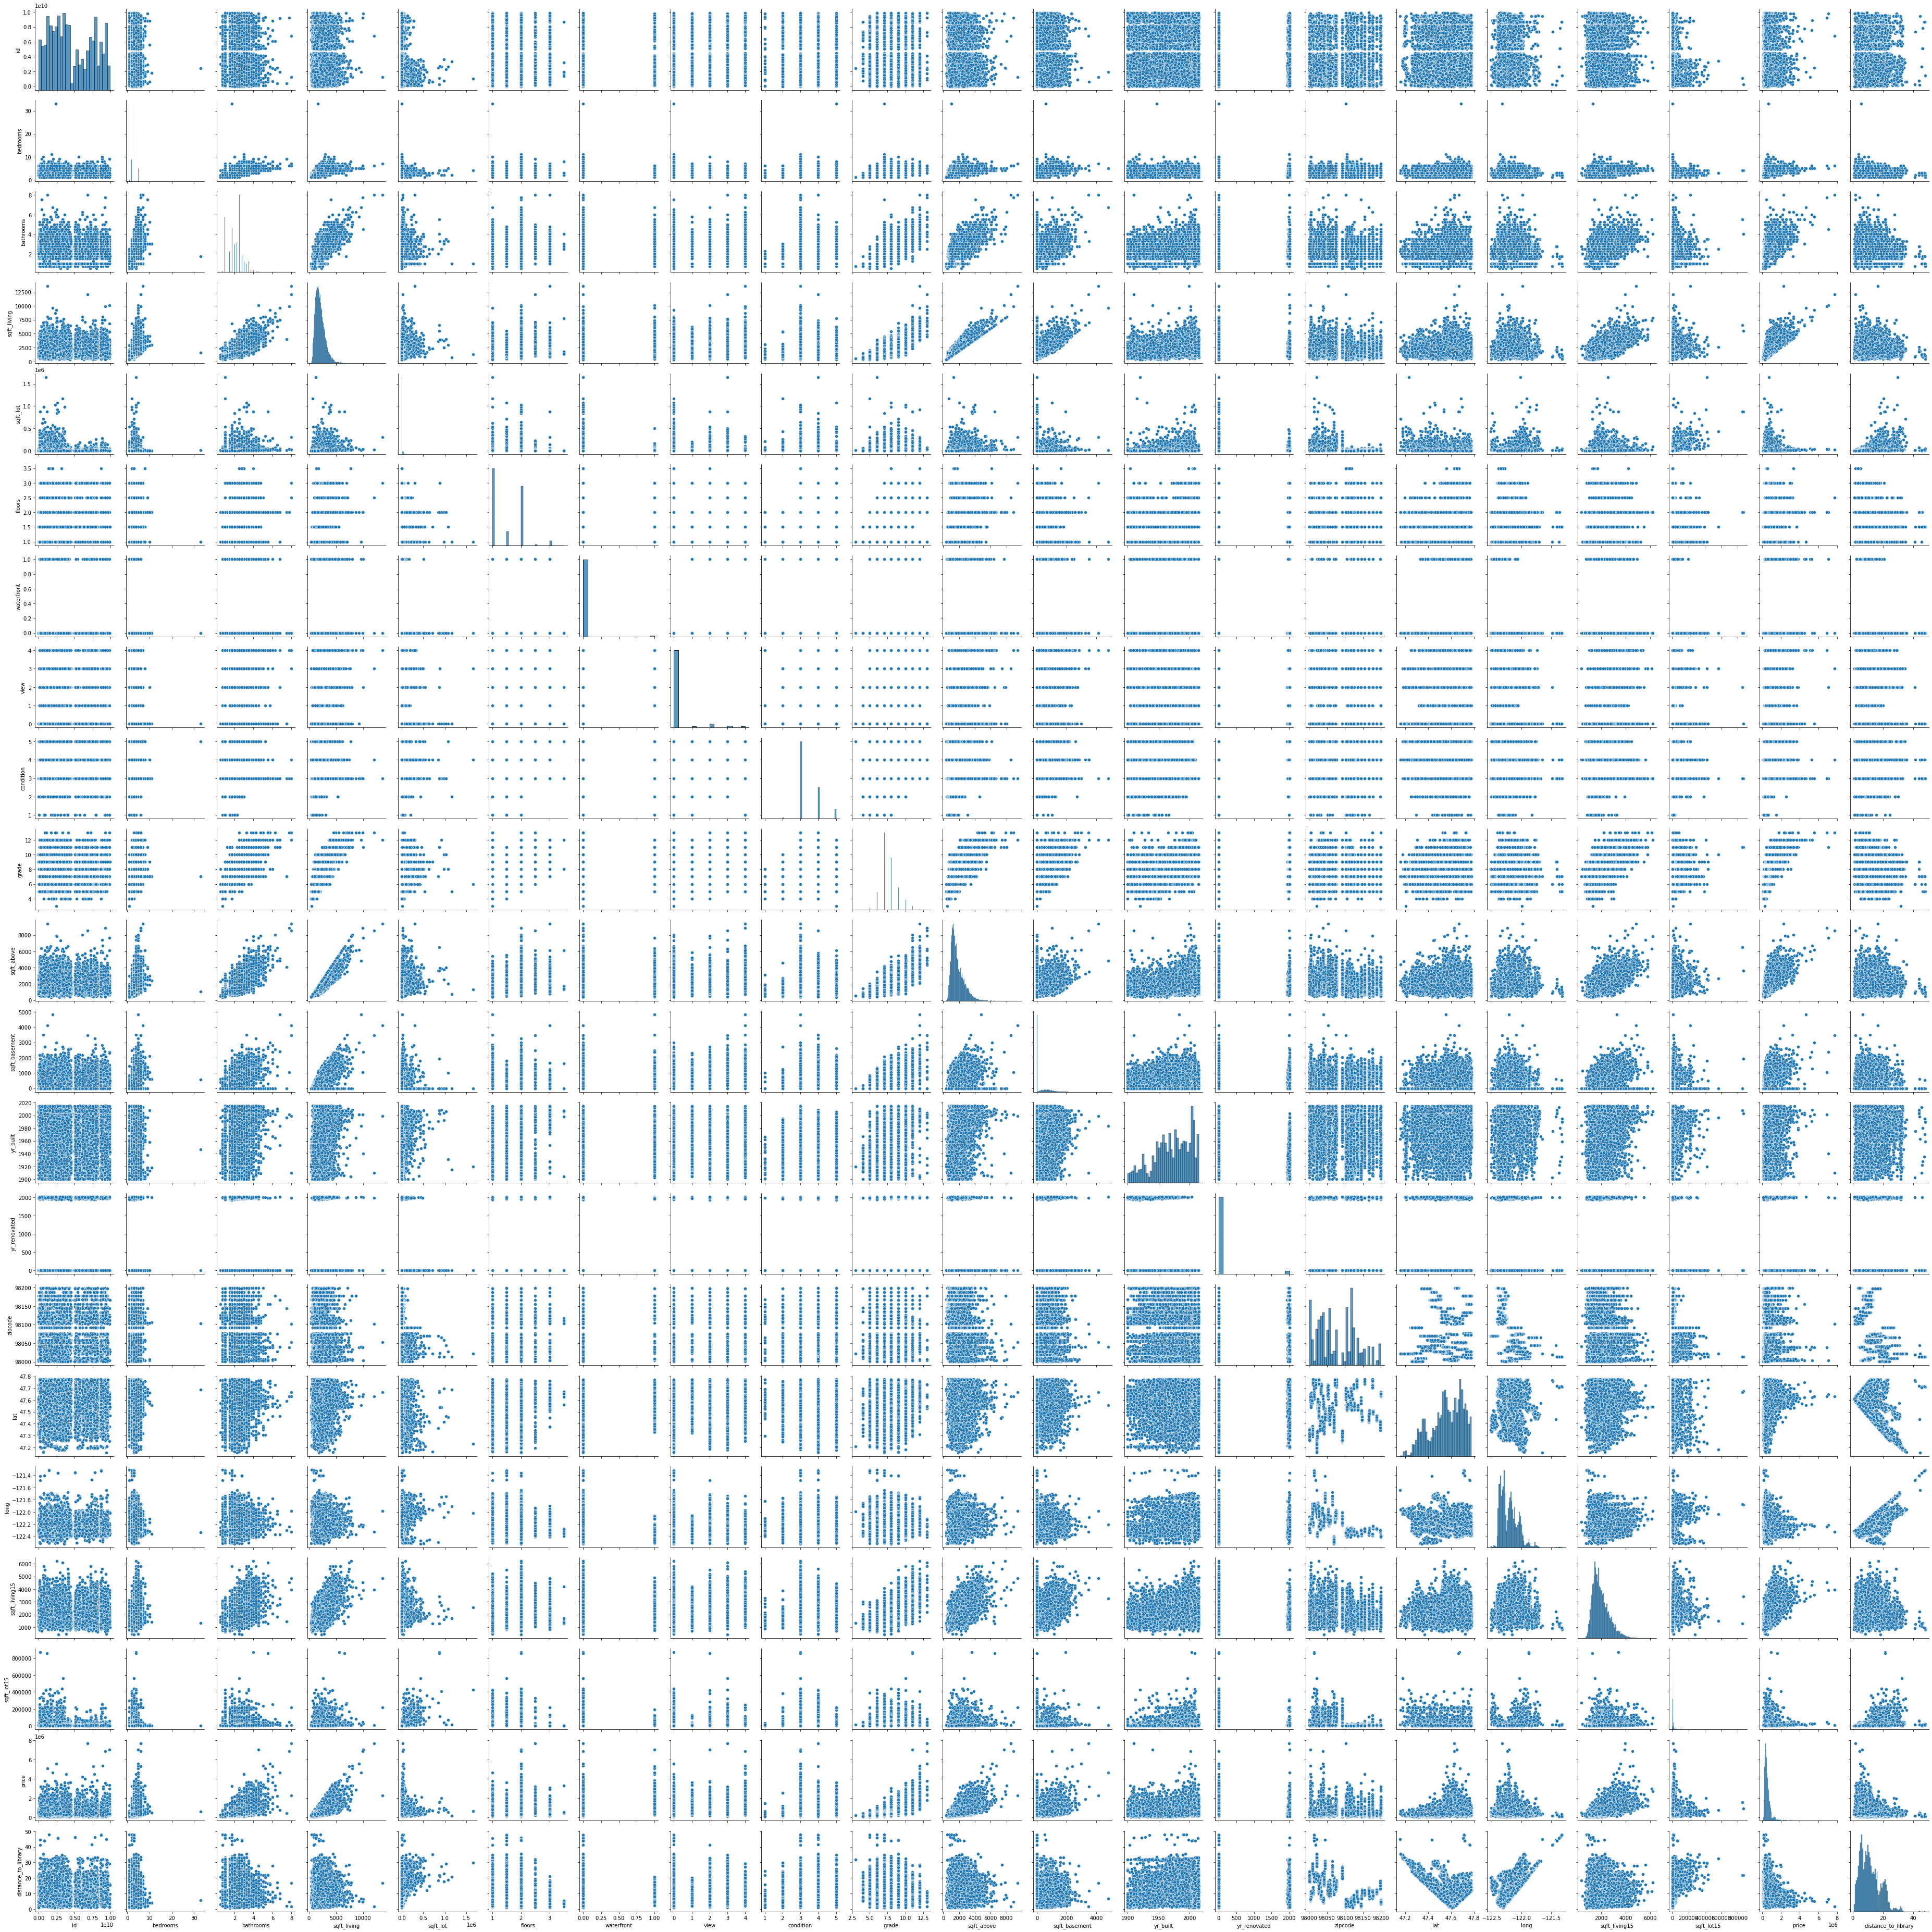

In [45]:
sns.pairplot(df)

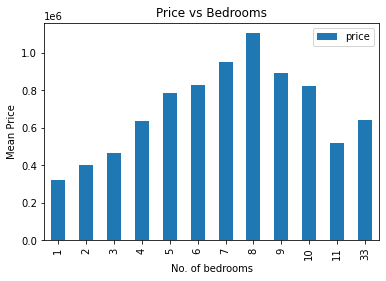

In [48]:
df.groupby('bedrooms').price.mean().plot(kind='bar');
plt.xlabel("No. of bedrooms")
plt.ylabel("Mean Price")
plt.title("Price vs Bedrooms")
plt.legend()

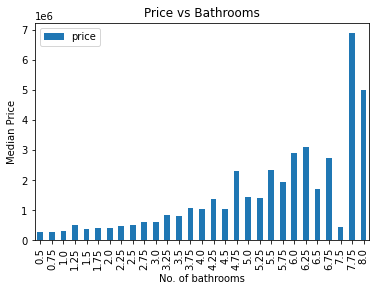

In [51]:
plt.figure(figsize=(6, 4))
df.groupby('bathrooms').price.median().plot(kind='bar')
plt.xlabel("No. of bathrooms")
plt.ylabel("Median Price")
plt.title("Price vs Bathrooms")
plt.legend()

In [53]:
sqft_srs = df[['sqft_living','price']].sort_values(by='sqft_living')

In [54]:
sqft_df = sqft_srs.reset_index().drop('index',axis=1)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

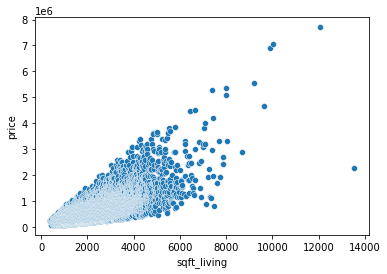

In [55]:
sns.scatterplot(data=sqft_df, x="sqft_living", y="price")

In [59]:
from glob import glob
from folium import plugins
from folium.plugins import HeatMap


In [60]:
m = folium.Map([47, -122], tiles='stamentoner', zoom_start=6)
data = df[["lat","long"]].values.tolist()
HeatMap(data).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

m

NameError: name 'folium' is not defined

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

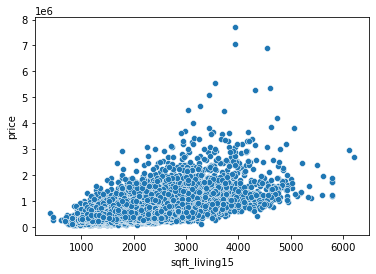

In [61]:
sns.scatterplot(data=df, x="sqft_living15", y="price")

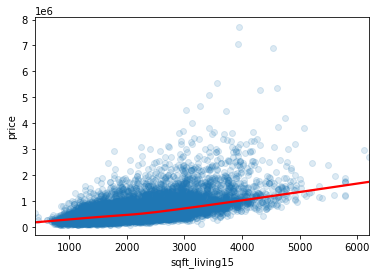

In [75]:
sns.regplot(data=df, x="sqft_living15", y="price", lowess=True,  scatter_kws={'alpha':0.15},line_kws={'color': 'red'});

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

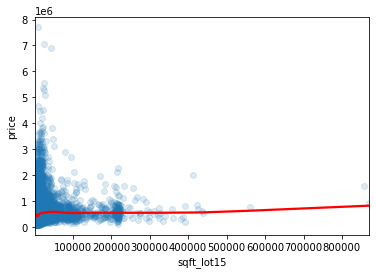

In [77]:
sns.regplot(data=df, x="sqft_lot15", y="price", lowess=True, scatter_kws={'alpha':0.15},line_kws={'color': 'red'})

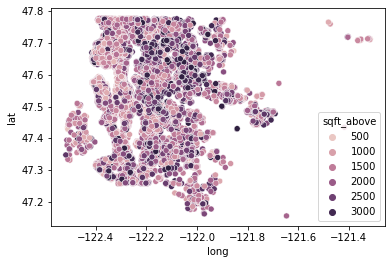

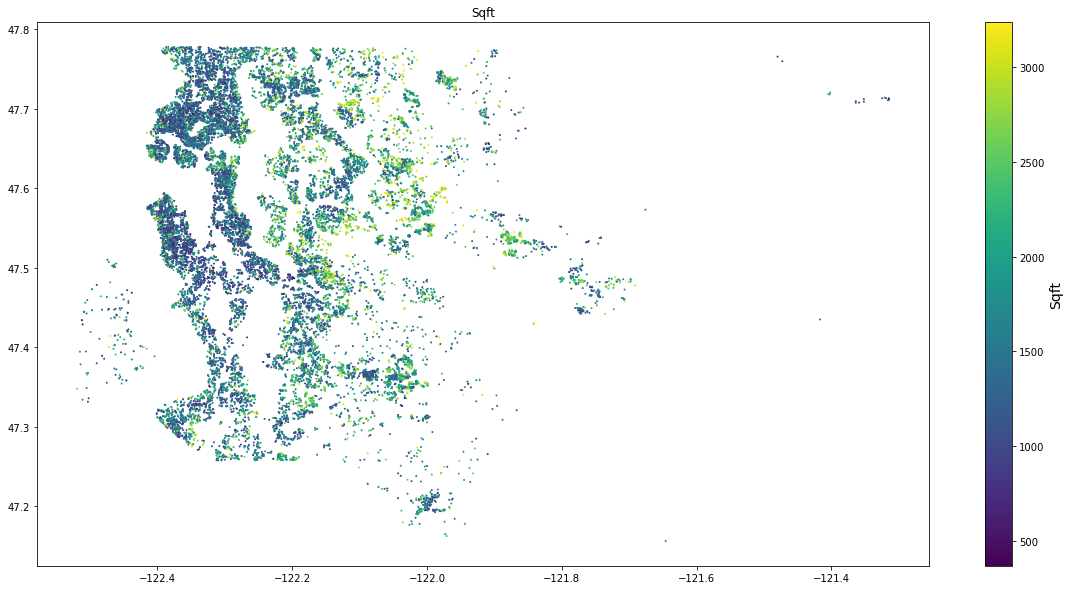

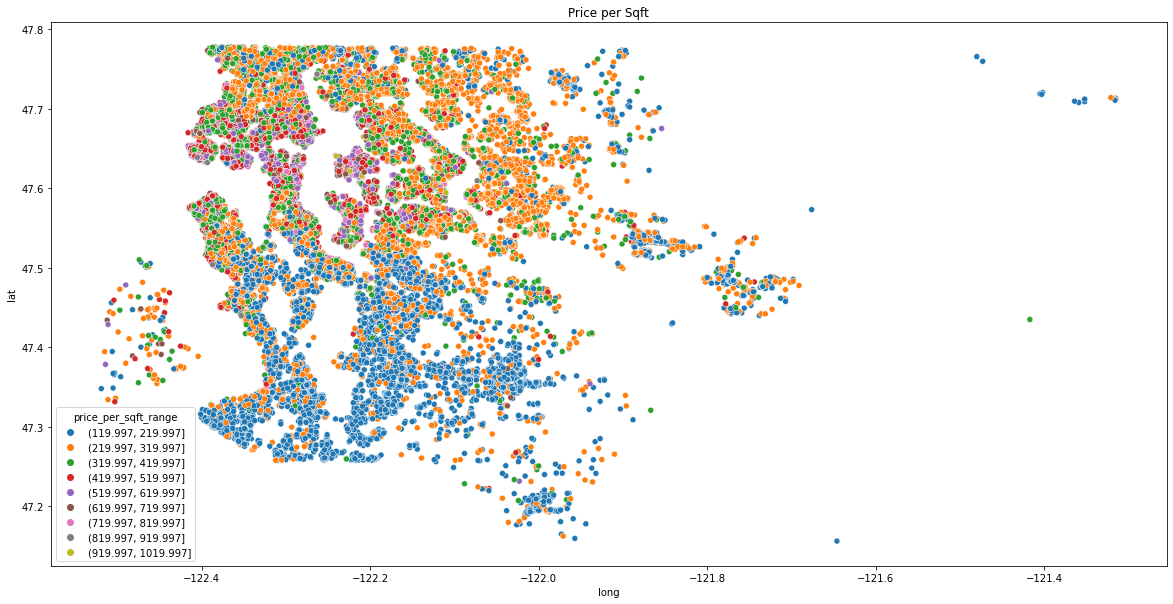

In [78]:
df_question1=df
df_question1['price_per_sqft'] =df_question1["price"]/df_question1["sqft_above"]
 # arrange price/sqft, remove outliers and form bins of size 100
bins= np.arange(np.quantile(df_question1.price_per_sqft, .015) , 
                np.quantile(df_question1.price_per_sqft, 0.9985), step=100)
#Segment and sort price/sqft into bins
df_question1['price_per_sqft_range'] = pd.cut(df_question1['price_per_sqft'],bins) 
df_out = df_question1.loc[(df_question1['price_per_sqft'] > 119) & (df_question1['price_per_sqft'] < 500)]

df_out2 = df_question1.loc[(df_question1['sqft_above'] > 180) & (df_question1['sqft_above'] < 3240)]
sns.scatterplot(data=df_out2,x="long", y="lat", hue= 'sqft_above')
plt.show()

plt.figure(figsize=(20,10))
# sns.scatterplot(data=df_question1,x="long", y="lat", hue= 'sqft_living_range')
plt.scatter(df_out2['long'], df_out2['lat'], c=df_out2['sqft_above'],s=1)
plt.colorbar().set_label('Sqft', fontsize=14)
plt.title('Sqft')
plt.show()

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_question1,x="long", y="lat", hue= 'price_per_sqft_range')
# plt.scatter(df_out['long'], df_out['lat'], c=df_out['price_per_sqft'],s=1)
# plt.colorbar().set_label('price per Sqft', fontsize=14)
plt.title('Price per Sqft')
plt.show()
